<font color = green >

# Home task

</font>

## Titanic - Machine Learning from Disaster

Predict survival on the [Titanic](https://www.kaggle.com/c/titanic)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [ ]:
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data\\titanic') 

df_train = pd.read_csv(os.path.join(path,'train.csv'))
test_labels = pd.read_csv(os.path.join(path, 'gender_submission.csv'))
df_test = pd.read_csv(os.path.join(path,'test.csv'))
df_test = df_test.merge(test_labels, on='PassengerId', how='left')

df = pd.concat([df_train, df_test], ignore_index=True)

In [7]:
df['Survived'].isnull().sum()

0

In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
#Drop all categorical and unnecessery features
categorical_features = ['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
cont_df = df #continuous-features dataframe
cont_df = cont_df.drop(categorical_features, axis=1)

cont_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [10]:
cont_df.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.467485,30.510986,0.496933,0.311656,23.879124
1,2.010121,28.931079,0.502024,0.506073,48.811497


In [11]:
cont_df.groupby((cont_df['Age']).isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.398662,2.207457,29.881138,0.502868,0.420650,36.686080
True,0.292776,2.642586,NaN,0.482890,0.243346,19.823319


It can be noted that people whose age was missing traveled with cheaper tickets and had a lower chance of survival.

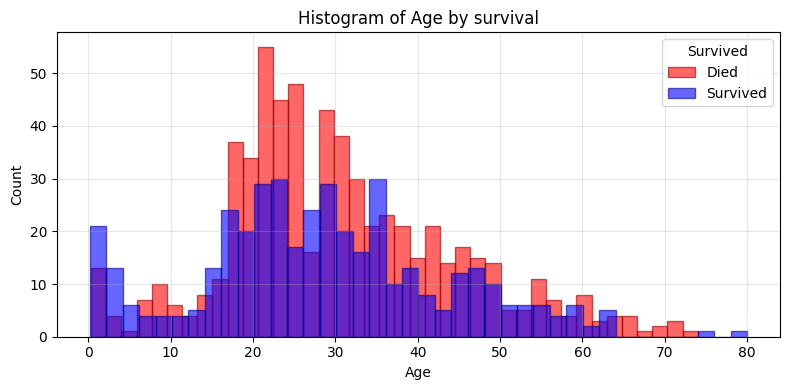

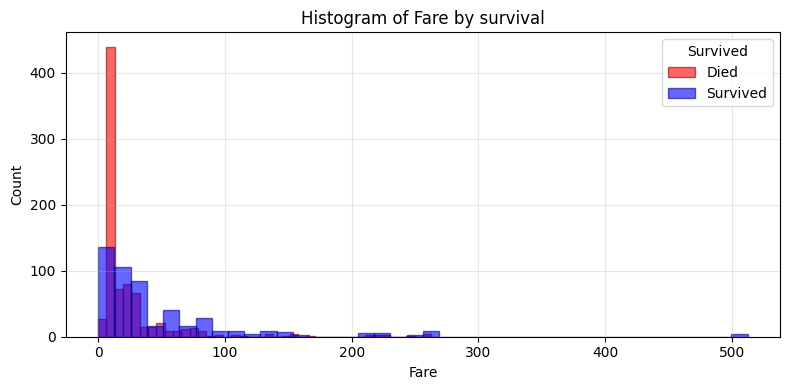

In [12]:
for col in ['Age', 'Fare']:
    plt.figure(figsize=(8, 4))
    
    died_data = cont_df[cont_df['Survived'] == 0][col].dropna()
    survived_data = cont_df[cont_df['Survived'] == 1][col].dropna()
    
    plt.hist(died_data, bins=40, alpha=0.6, color='red', label='Died', 
             edgecolor='darkred', linewidth=1)
    plt.hist(survived_data, bins=40, alpha=0.6, color='blue', label='Survived', 
             edgecolor='darkblue', linewidth=1)
    
    plt.title(f'Histogram of {col} by survival')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Survived')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


<Figure size 640x480 with 0 Axes>

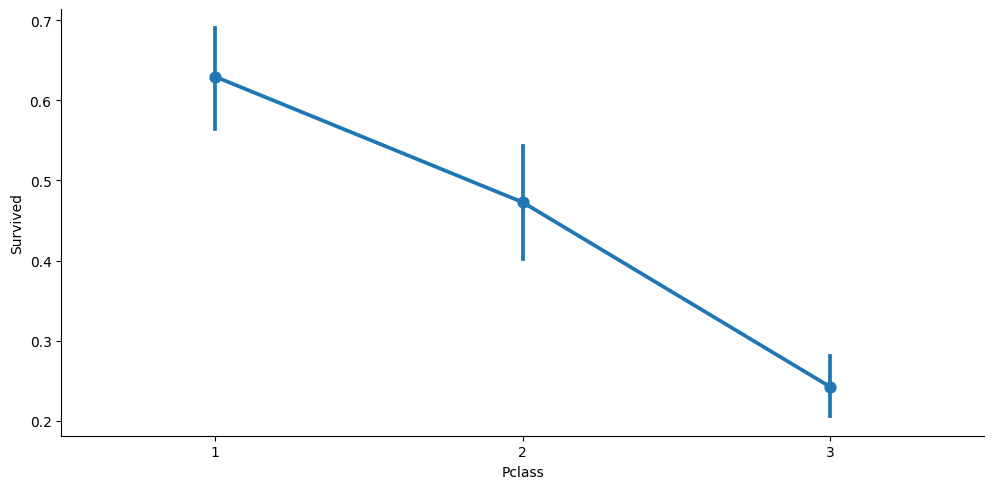

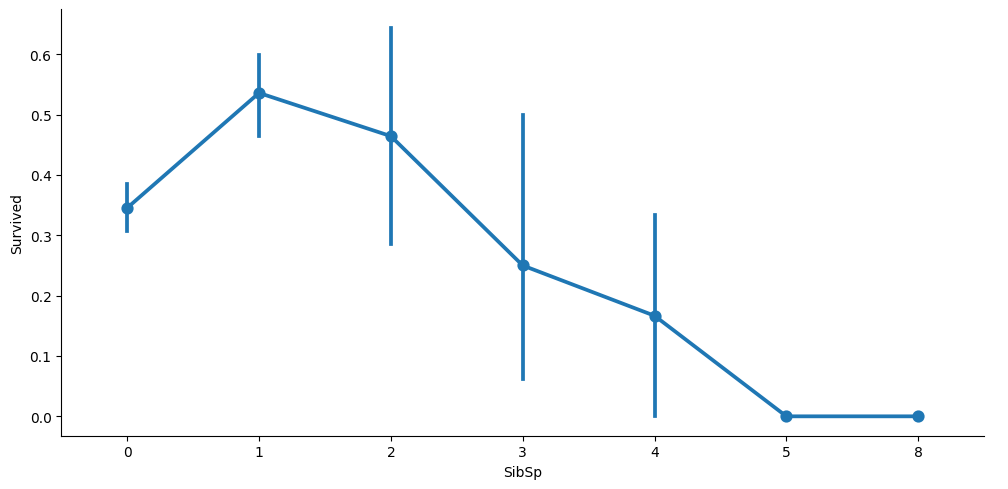

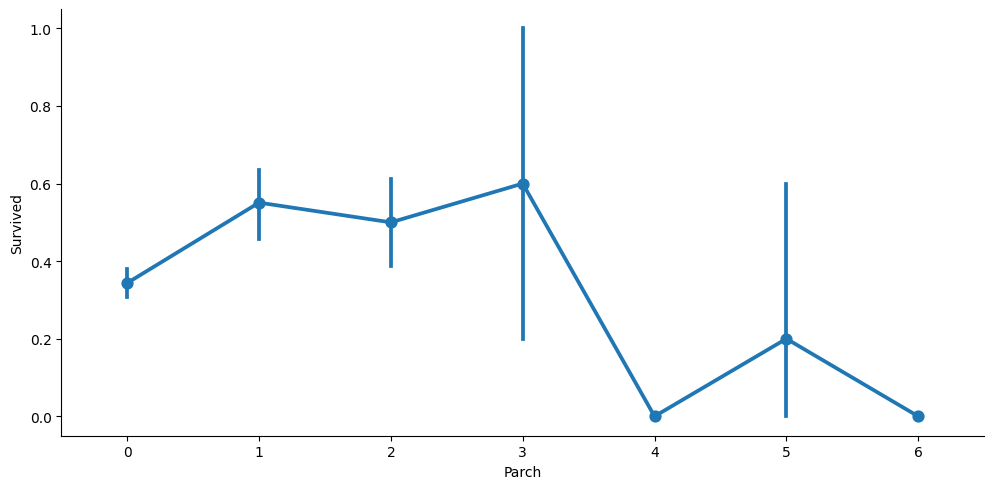

In [13]:
for i, col in enumerate(['Pclass', 'SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=df_train, kind='point', aspect=2)

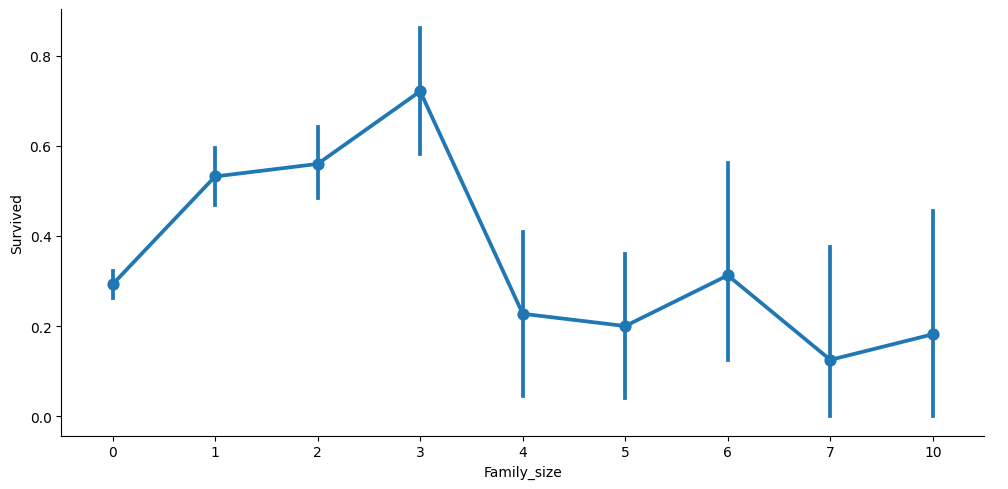

In [14]:
cont_df['Family_size'] = cont_df['SibSp'] + cont_df['Parch']
sns.catplot(x='Family_size', y='Survived', data=cont_df, kind='point', aspect=2)

In [15]:
cont_df.isnull().sum()

Survived         0
Pclass           0
Age            263
SibSp            0
Parch            0
Fare             1
Family_size      0
dtype: int64

In [16]:
cont_df['Age'] = cont_df['Age'].fillna(cont_df['Age'].mean())

In [17]:
cont_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [18]:
cont_df.head()

,Survived,Pclass,Age,Fare,Family_size
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,1
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,1
4,0,3,35.0,8.0500,0


In [19]:
cat_df = df #categorical-features dataframe
cat_df = cat_df.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch', 'Age', 'Fare', 'Pclass'], axis=1)

In [20]:
cat_df.head()

,Survived,Sex,Cabin,Embarked
0,0,male,NaN,S
1,1,female,C85,C
2,1,female,NaN,S
3,1,female,C123,S
4,0,male,NaN,S


In [21]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  1309 non-null   int64 
 1   Sex       1309 non-null   object
 2   Cabin     295 non-null    object
 3   Embarked  1307 non-null   object
dtypes: int64(1), object(3)
memory usage: 41.0+ KB


In [22]:
cat_df.groupby(cat_df['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.610169
True     0.309665
Name: Survived, dtype: float64

In [23]:
cat_df['Cabin_availability'] = np.where(cat_df['Cabin'].isnull(), 0, 1)
cat_df.head()

,Survived,Sex,Cabin,Embarked,Cabin_availability
0,0,male,NaN,S,0
1,1,female,C85,C,1
2,1,female,NaN,S,0
3,1,female,C123,S,1
4,0,male,NaN,S,0


<Figure size 640x480 with 0 Axes>

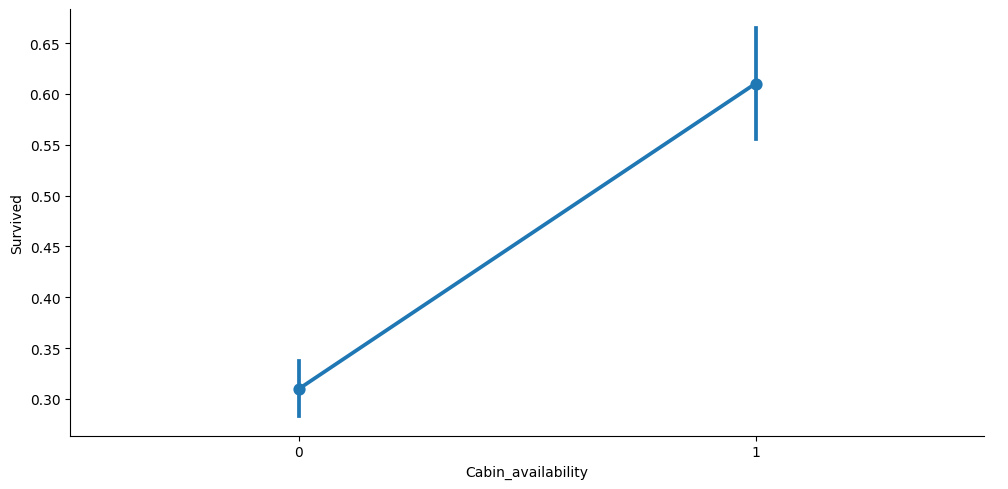

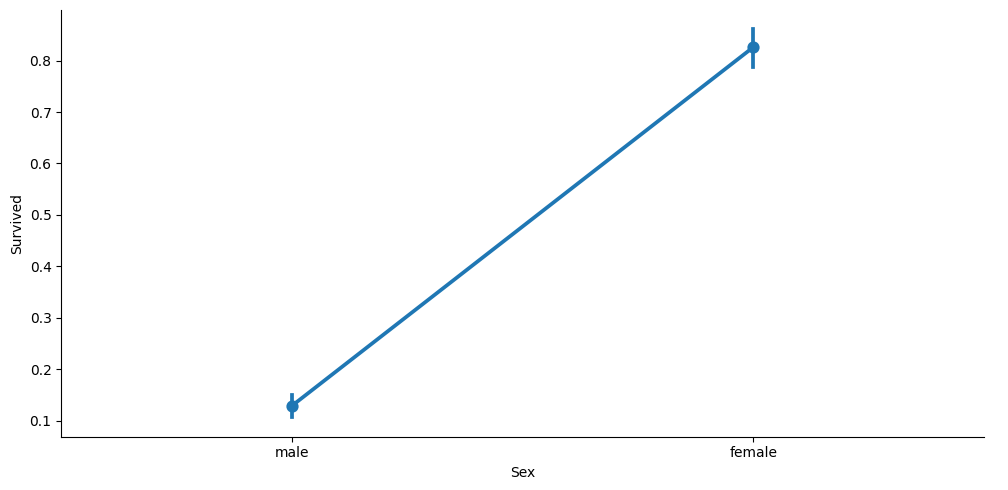

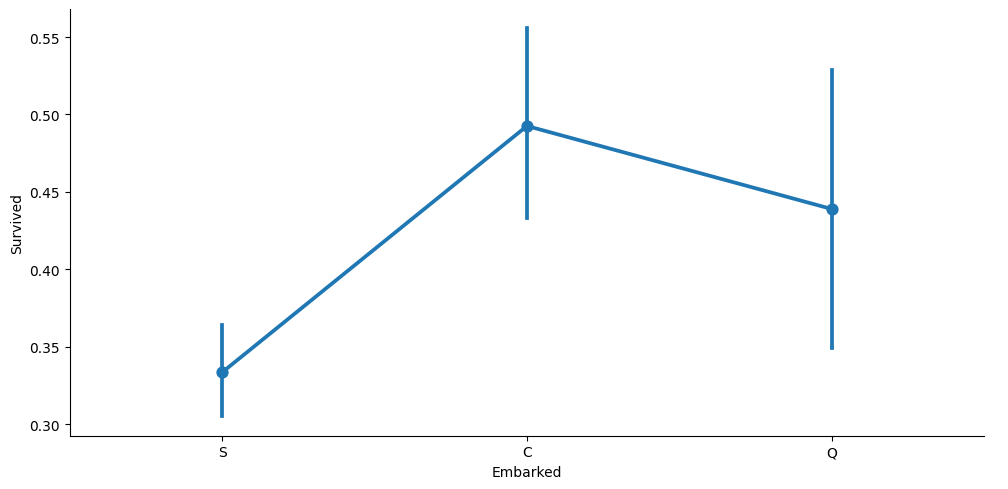

In [24]:
for i, col in enumerate(['Cabin_availability', 'Sex', 'Embarked']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=cat_df, kind='point', aspect=2)

In [25]:
cat_df.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,113,60,291
male,157,63,623


In [26]:
cat_df.pivot_table('Survived', index='Cabin_availability', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_availability,,,
0,152,118,744
1,118,5,170


We can conclude that the Embarked does not affect the survival rate.

In [27]:
binary_gender = {'male': 0, 'female': 1}
cat_df['Sex'] = cat_df['Sex'].map(binary_gender)

In [28]:
cat_df = cat_df.drop(['Cabin', 'Embarked'], axis=1)

In [29]:
cat_df.head()

,Survived,Sex,Cabin_availability
0,0,0,0
1,1,1,1
2,1,1,0
3,1,1,1
4,0,0,0


In [30]:
titanic = pd.concat([cont_df, cat_df], axis=1)
titanic.head()

,Survived,Pclass,Age,Fare,Family_size,Survived,Sex,Cabin_availability
0,0,3,22.0,7.2500,1,0,0,0
1,1,1,38.0,71.2833,1,1,1,1
2,1,3,26.0,7.9250,0,1,1,0
3,1,1,35.0,53.1000,1,1,1,1
4,0,3,35.0,8.0500,0,0,0,0


In [31]:
titanic.isnull().sum()

Survived              0
Pclass                0
Age                   0
Fare                  1
Family_size           0
Survived              0
Sex                   0
Cabin_availability    0
dtype: int64

In [32]:
titanic[titanic['Fare'].isnull()]

,Survived,Pclass,Age,Fare,Family_size,Survived,Sex,Cabin_availability
1043,0,3,60.5,NaN,0,0,0,0


In [33]:
titanic['Fare'] = titanic['Fare'].fillna(titanic[titanic['Pclass']==3]['Fare'].mean())
titanic[titanic['Fare'].isnull()]

,Survived,Pclass,Age,Fare,Family_size,Survived,Sex,Cabin_availability


In [34]:
titanic.to_csv(os.path.join(path, 'titanic_cleaned.csv'), index=False)